In [1668]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
import re
import nltk
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Liliya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1669]:
# Data Exploration

# Loading the data
train = pd.read_json(
    'https://raw.githubusercontent.com/krupal-p/3251-Term-Project/master/Term%20Project/whats-cooking/train.json'
)
test = pd.read_json(
    'https://raw.githubusercontent.com/krupal-p/3251-Term-Project/master/Term%20Project/whats-cooking/test.json'
)
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [1670]:
test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [1671]:
len(pd.value_counts(train['cuisine']))

20

In [1672]:
cuisine_count = pd.value_counts(train['cuisine'])
cuisine_count

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

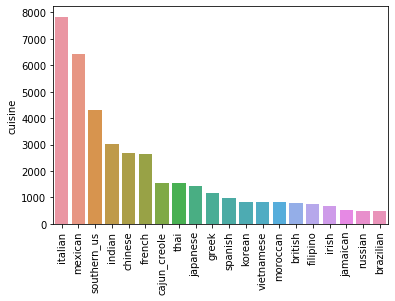

In [1673]:
cuisine_frequency = sns.barplot(x=cuisine_count.index, y=cuisine_count)
for x in cuisine_frequency.get_xticklabels():
    x.set_rotation(90)

In [1674]:
train['ingredients']

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour, ground pepper, salt, tomatoes, g...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
5        [plain flour, sugar, butter, eggs, fresh ginge...
6        [olive oil, salt, medium shrimp, pepper, garli...
7        [sugar, pistachio nuts, white almond bark, flo...
8        [olive oil, purple onion, fresh pineapple, por...
9        [chopped tomatoes, fresh basil, garlic, extra-...
10       [pimentos, sweet pepper, dried oregano, olive ...
11       [low sodium soy sauce, fresh ginger, dry musta...
12       [Italian parsley leaves, walnuts, hot red pepp...
13       [ground cinnamon, fresh cilantro, chili powder...
14       [fresh parmesan cheese, butter, all-purpose fl...
15       [tumeric, vegetable stock, tomatoes, garam mas...
16       [greek yogurt, lemon curd, confectioners sugar.

In [1675]:
ingredients_set = set()
ingredients_list = list()

In [1676]:
for x in train['ingredients']:

    for y in x:
        ingredients_set.add(y)
        ingredients_list.append(y)

In [1677]:
ingredients_set

{'english walnuts',
 'green garlic',
 'cream of tartar',
 'melon liqueur',
 'natural low-fat yogurt',
 'buttercup squash',
 'large eggs',
 'msg',
 'pork bones',
 'Argo Corn Starch',
 "tony chachere's seasoning",
 'tea bags',
 'maltose',
 'crumb crust',
 'chestnuts',
 'tripe',
 'non stick spray',
 'paste tomato',
 'ducklings',
 'granular no-calorie sucralose sweetener',
 'Thai red curry paste',
 'part-skim ricotta cheese',
 'cajun spice mix',
 'pasta water',
 'masur dal',
 'eggroll wrappers',
 'Hidden Valley® Farmhouse Originals Italian with Herbs Dressing',
 'seasoned black beans',
 'swanson chicken stock',
 'poppadoms',
 'Progresso Diced Tomatoes',
 'chicken breast fillets',
 'mint leaves',
 'liquorice',
 'back bacon',
 'kefalotyri',
 'low sodium tomato',
 'Corn Flakes Cereal',
 'salmon fillets',
 'ranch dip mix',
 'unbaked pie shells',
 'burrito seasoning mix',
 'chopped hazelnuts',
 'brioche',
 'boneless pork shoulder',
 'candy canes',
 'treacle',
 'fresh salmon',
 'candied chestnut

In [1679]:
len(ingredients_set)  #unique ingredients

6714

In [1680]:
counter = 0
for x in train['ingredients']:
    for y in x:
        counter += 1
counter  #total ingredients

428275

In [1681]:
train['num_ingredients'] = train['ingredients'].apply(
    len)  #calculates number of ingredients in a cuisine
train['num_ingredients']

0         9
1        11
2        12
3         4
4        20
5        12
6        13
7        10
8        13
9         6
10       13
11       15
12       10
13       17
14       12
15       10
16        4
17        4
18        4
19       13
20       12
21        6
22        6
23       12
24        9
25       15
26       10
27       11
28       14
29        4
         ..
39744     8
39745     4
39746    19
39747     6
39748     8
39749    14
39750    14
39751    11
39752     5
39753    12
39754    18
39755    14
39756     9
39757     4
39758    16
39759    10
39760     7
39761    18
39762    12
39763     7
39764    14
39765     4
39766    10
39767    13
39768    10
39769    12
39770     7
39771    12
39772    21
39773    12
Name: num_ingredients, Length: 39774, dtype: int64

In [1682]:
Counter(ingredients_list).most_common()

[('salt', 18049),
 ('onions', 7972),
 ('olive oil', 7972),
 ('water', 7457),
 ('garlic', 7380),
 ('sugar', 6434),
 ('garlic cloves', 6237),
 ('butter', 4848),
 ('ground black pepper', 4785),
 ('all-purpose flour', 4632),
 ('pepper', 4438),
 ('vegetable oil', 4385),
 ('eggs', 3388),
 ('soy sauce', 3296),
 ('kosher salt', 3113),
 ('green onions', 3078),
 ('tomatoes', 3058),
 ('large eggs', 2948),
 ('carrots', 2814),
 ('unsalted butter', 2782),
 ('ground cumin', 2747),
 ('extra-virgin olive oil', 2747),
 ('black pepper', 2627),
 ('milk', 2263),
 ('chili powder', 2036),
 ('oil', 1970),
 ('red bell pepper', 1939),
 ('purple onion', 1896),
 ('scallions', 1891),
 ('grated parmesan cheese', 1886),
 ('sesame oil', 1773),
 ('corn starch', 1757),
 ('ginger', 1755),
 ('baking powder', 1738),
 ('jalapeno chilies', 1730),
 ('dried oregano', 1707),
 ('chopped cilantro fresh', 1698),
 ('fresh lemon juice', 1679),
 ('diced tomatoes', 1624),
 ('fresh parsley', 1604),
 ('minced garlic', 1583),
 ('chicken

## Create a logistic regression model
### Training and validation data

In [1683]:
train_shuf = train.sample(frac=1)

In [1684]:
# Because Kaggle's test set doesn't have true labels, let's use a portion of the train set for testing.
TRAINING_SIZE = 30000
all_cuisines = train_shuf['cuisine'].values.tolist()
all_train_recipes = train_shuf['ingredients'].values.tolist()
train_recipes = all_train_recipes[:TRAINING_SIZE]
test_recipes = all_train_recipes[TRAINING_SIZE:]
train_cuisines = all_cuisines[:TRAINING_SIZE]
test_cuisines = all_cuisines[TRAINING_SIZE:]

print(f'TRAIN: Num recipes = {len(train_recipes)}')
print(
    f'TRAIN: Num unique ingredients = {len(set([ingr for recipe in train_recipes for ingr in recipe]))}'
)
print(f'TEST: Num recipes = {len(test_recipes)}')
print(
    f'TEST: Num unique ingredients = {len(set([ingr for recipe in test_recipes for ingr in recipe]))}'
)

TRAIN: Num recipes = 30000
TRAIN: Num unique ingredients = 6221
TEST: Num recipes = 9774
TEST: Num unique ingredients = 4449


### Functions to preprocess recipes

In [1685]:
PS = PorterStemmer()


def normalize_word(word):
    norm_word = PS.stem(word)
    return norm_word


BAD_WORDS = [
    'food', 'center', 'oz', 'double', 'compressed', 'homemade', 'bottled',
    'plus', 'in', 'and', 'ready', 'au', 'drained', 'paper', 'mince', 'added',
    'piece', 'challenge', 'grated', 'less', 'bottle', 'cloud', 'bottoms',
    'size', 'medium', 'peel', 'acting', 'based', 'full', 'grating', 'world',
    'ml', 'freshly', 'vegan', 'finely', 'bottom', 'fat', 'fashioned', 'high',
    'for', 'comfort', 'ao', 'dinosaur', 'bought', 'nonstick', 'crumbled',
    'instant', 'dinner', 'fine', 'blade', 'cut', 'diced', 'promise', 'new',
    'mix', 'pan', 'layer', 'miniature', 'mashed', 'field', 'straight',
    'precooked', 'regular', 'warm', 'reduced', 'imitation', 'peeled', 'islands',
    'fresh', 'dress', 'prepar', 'minced', 'home', 'ground', 'store', 'country',
    'distilled', 'mini', 'nonfat', 'beaten', 'hand', 'it', 'stir', 'success',
    'domino', 'granny', 'frozen', 'old', 'farm', 'minute', 'drink', 'mild',
    'miracle', 'of', 'sliced', 'TACO BELL', 'half', 'pure', 'KRAFT', 'natural',
    'believ', 'land', 'style', 'well', 'canned', 'no', 'collect', 'purpose',
    'boil', 'side', 'prebaked', 'light', 'digestive', 'accompaniment', 'aka',
    'farmer', 'grade', 'disco', 'quick', 'english', 'lower', 'hot', 'brand',
    'part', 'kitchen', 'concentrate', 'four', 'free', 'extra', 'glutein',
    'pieces', 'energy', 'culinary', 'chopped', 'fluff', 'rich', 'wok', 'inch',
    'oven', 'large', 'pot', 'organic', 'forest', 'diamond', 'serving',
    'calorie', 'mrs', 'club', 'crushed', 'farms', 'doubl', 'Heinz', 'grand',
    'lowfat', 'short', 'broad', 'fatfree', 'me', 'hair', 'classic', 'firmly',
    'giant', 'lite', 'drain', 'whole', 'small', 'any', 'cooking', 'flat',
    'diet', 'believe', 'mary', 'bee', 'thousand', 'quarters', 'best', 'crusty',
    'or', 'cooked', 'an', 'beaters', 'to', 'do', 'cold', 'virgin', 'simple',
    'fully', 'g', 'imperial', 'cuts', 'dish', 'plain', 'unsalted', 'homestyl',
    'one', 'all', 'real', 'lb', 'premium', 'con', 'pound', 'made', 'on', 'fast',
    'prepared', 'campbell', 'lady', 'hothouse', 'california', 'pain', 'equal',
    'low', 'filled', 'dried', 'shredded', 'parts', 'good', 'into', 'island',
    'sodium', 'kg', 'covered', 'firm', 'hidden'
]


def preprocess_recipes(recipes):
    processed_recipes = []

    for recipe in recipes:
        processed_recipe = []

        for ingredient in recipe:
            words = re.sub('[^A-Za-z]', ' ', ingredient).split()
            words = [w.lower() for w in words if len(w) > 0]
            good_words = [w for w in words if not w in BAD_WORDS]
            norm_words = [normalize_word(w) for w in good_words]
            processed_ingredient = ' '.join(norm_words)
            processed_recipe.append(processed_ingredient)

        processed_recipes.append(processed_recipe)

    return processed_recipes

### Special characters and numbers

In [1686]:
all_chars = ' '.join(ingredients_set)
spec_chars = sorted(
    [char for char in set(all_chars) if re.findall('[^A-Za-z ]', char)])
num_recipes_with_spec_chars = len(
    [r for r in all_train_recipes if any(c in ' '.join(r) for c in spec_chars)])
num_recipes_with_num = len(
    [r for r in all_train_recipes if any(c in ' '.join(r) for c in '[0-9]')])
num_recepies_with_cap = len(
    [r for r in all_train_recipes if any(c in ' '.join(r) for c in '[A-Z]')])

print(f'The removed special characters and numbers are: \n {spec_chars} \n')
print(f'Num recipes with special characters is: {num_recipes_with_spec_chars}')
print(f'Num recipes with numbers is: {num_recipes_with_num}')
print(f'Num recipes with capital letters is: {num_recepies_with_cap}')

The removed special characters and numbers are: 
 ['!', '%', '&', "'", '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '®', 'â', 'ç', 'è', 'é', 'í', 'î', 'ú', '’', '€', '™'] 

Num recipes with special characters is: 11440
Num recipes with numbers is: 10080
Num recipes with capital letters is: 10277


### Preprocess training and validation data

In [1687]:
processed_train_recipes = preprocess_recipes(train_recipes)
print(f'TRAIN Num processed recipes = {len(processed_train_recipes)}')
print(
    f'TRAIN Num unique processed ingredients = {len(set([ingr for recipe in processed_train_recipes for ingr in recipe]))}'
)

TRAIN Num processed recipes = 30000
TRAIN Num unique processed ingredients = 5071


In [1688]:
processed_test_recipes = preprocess_recipes(test_recipes)
print(f'TEST Num processed recipes = {len(processed_test_recipes)}')
print(
    f'TEST Num unique processed ingredients = {len(set([ingr for recipe in processed_test_recipes for ingr in recipe]))}'
)

TEST Num processed recipes = 9774
TEST Num unique processed ingredients = 3624


### Encode cuisines

In [1689]:
le = preprocessing.LabelEncoder()
le.fit(train_cuisines)
y_train = le.transform(train_cuisines)
y_test = le.transform(test_cuisines)

### Encode recipes

In [1690]:
mlb = MultiLabelBinarizer()
mlb.fit(processed_train_recipes)
x_train = mlb.transform(processed_train_recipes)
x_test = mlb.transform(processed_test_recipes)

C:\Liliya\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:951: UserWarning: unknown class(es) ['agav tequila', 'age gouda', 'amaranth', 'amber rum', 'amberjack fillet', 'ammonium bicarbon', 'amontillado sherri', 'appl schnapp', 'arrow root', 'assam', 'azuki bean', 'b n dictin', 'babi artichok', 'bacardi mixer margarita', 'bacardi superior', 'back rib', 'bacon salt', 'bake corn tortilla chip', 'balm leav', 'bamboo', 'banana bread', 'banana extract', 'banana pure', 'baobab fruit powder', 'barberri', 'barilla linguin', 'barley flake', 'bass', 'bay blacken season', 'beer batter', 'beetroot', 'bigoli', 'black bean sauc with garlic', 'black cherri', 'black pud', 'blanco tequila', 'block cream chees', 'bone', 'boneless chop', 'boneless skinless chicken tenderloin', 'boursin', 'boy choy', 'branston pickl', 'breakfast tea leav', 'broiler chicken', 'brown muscavado sugar', 'brown rice spaghetti', 'burro banana', 'butter flavor spray', 'butter salt', 'buttermilk self rise white

### Create a logistic regression model

In [1692]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

C:\Liliya\Programs\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Liliya\Programs\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Accuracy on the training set

In [1693]:
model.score(x_train, y_train)

0.8612333333333333

### Accuracy on the test set

In [1694]:
#The best score is: 0.7915899324739104
model.score(x_test, y_test)

0.7915899324739104

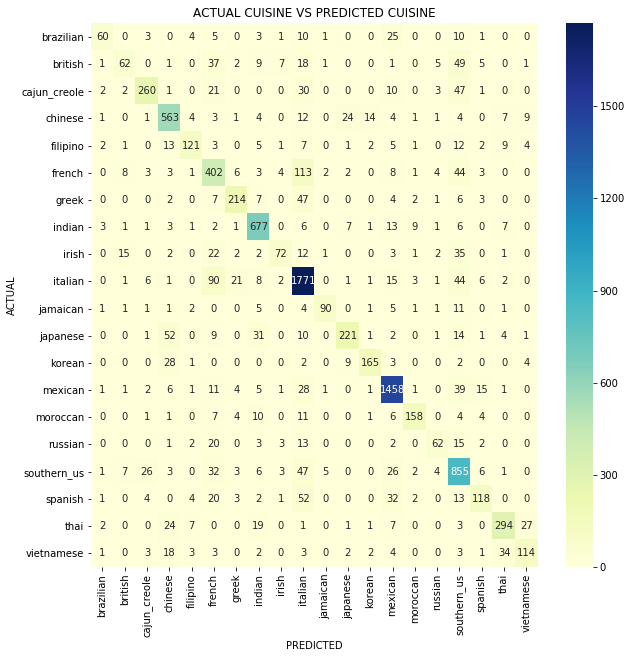

In [1695]:
cm = confusion_matrix(y_test, model.predict(x_test))
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap="YlGnBu",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
ax.set_title('ACTUAL CUISINE VS PREDICTED CUISINE')
plt.show()

In [1696]:
print(
    classification_report(y_test,
                          model.predict(x_test),
                          target_names=le.classes_))

              precision    recall  f1-score   support

   brazilian       0.79      0.49      0.60       123
     british       0.63      0.31      0.42       199
cajun_creole       0.83      0.69      0.75       377
     chinese       0.78      0.86      0.82       653
    filipino       0.80      0.64      0.71       189
      french       0.58      0.66      0.62       607
       greek       0.82      0.73      0.77       293
      indian       0.85      0.92      0.88       739
       irish       0.76      0.42      0.54       170
     italian       0.81      0.90      0.85      1973
    jamaican       0.89      0.72      0.80       125
    japanese       0.82      0.64      0.72       348
      korean       0.87      0.77      0.82       214
     mexican       0.89      0.93      0.91      1576
    moroccan       0.87      0.76      0.81       207
     russian       0.72      0.50      0.59       123
 southern_us       0.70      0.83      0.76      1027
     spanish       0.70    

In [1698]:
processed_recipes = processed_train_recipes.copy()
processed_recipes.extend(processed_test_recipes)

unique_cuisines = set(all_cuisines)
ingredients_for_cuisines = {}

for cuisine in unique_cuisines:
    ingredients_for_cuisines[cuisine] = set([
        ingr for i, r in enumerate(processed_recipes) for ingr in r
        if all_cuisines[i] == cuisine
    ])

for cuisine in unique_cuisines:
    unique_ingrs = [
        ingr for ingr in ingredients_for_cuisines[cuisine]
        if not any(other_cuisine for other_cuisine in unique_cuisines
                   if other_cuisine != cuisine and
                   ingr in ingredients_for_cuisines[other_cuisine])
    ]
    print(
        f'{cuisine}: {len(unique_ingrs)} unique ingreduents which is {round(len(unique_ingrs)/len(ingredients_for_cuisines[cuisine])*100,1)}% of all ingredients in this cuisine.'
    )

cajun_creole: 85 unique ingreduents which is 6.8% of all ingredients in this cuisine.
southern_us: 222 unique ingreduents which is 11.3% of all ingredients in this cuisine.
japanese: 128 unique ingreduents which is 10.6% of all ingredients in this cuisine.
spanish: 49 unique ingreduents which is 4.7% of all ingredients in this cuisine.
russian: 43 unique ingreduents which is 6.2% of all ingredients in this cuisine.
jamaican: 31 unique ingreduents which is 4.4% of all ingredients in this cuisine.
brazilian: 41 unique ingreduents which is 5.9% of all ingredients in this cuisine.
vietnamese: 41 unique ingreduents which is 4.4% of all ingredients in this cuisine.
mexican: 354 unique ingreduents which is 16.7% of all ingredients in this cuisine.
greek: 56 unique ingreduents which is 5.9% of all ingredients in this cuisine.
french: 165 unique ingreduents which is 9.6% of all ingredients in this cuisine.
filipino: 44 unique ingreduents which is 5.4% of all ingredients in this cuisine.
british